In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
namesngenre = np.load('./dataset/namesngenre.npy')

In [5]:
namesngenre

array([['Toy Story (1995)',
        'Adventure|Animation|Children|Comedy|Fantasy'],
       ['Jumanji (1995)', 'Adventure|Children|Fantasy'],
       ['Grumpier Old Men (1995)', 'Comedy|Romance'],
       ...,
       ['Elsa & Fred (2005)', 'Comedy|Drama|Romance'],
       ['Tomb Raider (2018)', 'Action|Adventure|Fantasy'],
       ['Fred Armisen: Standup for Drummers (2018)', 'Comedy']],
      dtype='<U158')

In [6]:
ratings_train = np.load('./dataset/ratings_train.npy')

In [7]:
ratings_train.shape

(610, 4980)

In [8]:
ratings_train

array([[ 4., nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan,  2., nan, ..., nan, nan, nan],
       [ 3., nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [9]:
np.nanmax(ratings_train)

5.0

In [13]:
from scipy.optimize import fsolve

# Define the equation
def equation(sigma, var_R, mu_UI):
    return sigma**4 + 2 * mu_UI**2 * sigma**2 - var_R

# Define the known values
var_R = std**2

initial_guess = 1.0
sigma = fsolve(equation, initial_guess, args=(var_R, mu_UI))[0]

print("The value of sigma is:", sigma)

The value of sigma is: 0.38489986190541


The values calculated above are going to be used in the U and I matrix initialization (recalculated in the MF class).

In [185]:
import MF
import importlib

# Reload a specific module
importlib.reload(MF)

<module 'MF' from 'c:\\Users\\User\\Documents\\Estudos\\M2 Dauphine\\Data Science Lab\\collaborativer_filter_user_recommendation\\collaborative_filter\\MF.py'>

In [186]:
k = 10

MF = MF.MatrixFactorizarion(ratings_train, l=0.001, mu=0.001, k=k)


[[3.52460599 3.52460599 3.52460599 ... 3.52460599 3.52460599 3.52460599]
 [3.52460599 3.52460599 3.52460599 ... 3.52460599 3.52460599 3.52460599]
 [3.52460599 3.52460599 3.52460599 ... 3.52460599 3.52460599 3.52460599]
 ...
 [3.52460599 3.52460599 3.52460599 ... 3.52460599 3.52460599 3.52460599]
 [3.52460599 3.52460599 3.52460599 ... 3.52460599 3.52460599 3.52460599]
 [3.52460599 3.52460599 3.52460599 ... 3.52460599 3.52460599 3.52460599]]


In [187]:
print(MF.C(MF.R, MF.I, MF.U, l=0.000001, mu=0.00001))

37379300.42680324


In [191]:
MF.fit(lr_I=0.0000000001, lr_U=0.0000000001, num_iterations=20)

Iteration 1: Cost = 37379308.58961513
Iteration 2: Cost = 37379308.590264946


KeyboardInterrupt: 

In [181]:
prediction_full = MF.predict()

## Result analysis

__Attention:__ Here we pick only the non nan values, which returns a 1-D array. Then we reshape a part of them so we can see it as a image and visually comapre the results.

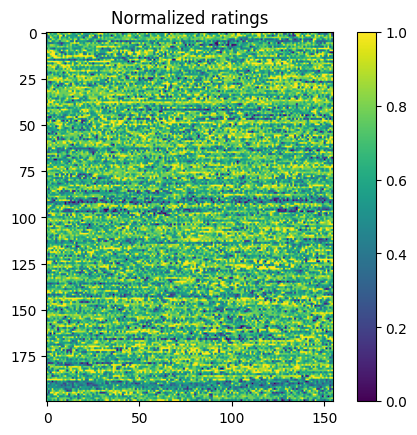

In [182]:
non_nan_indices = np.where(~np.isnan(ratings_train))
# Separate the row and column indices
row_indices, col_indices = non_nan_indices
R_non_nan = MF.R[row_indices, col_indices]
normalized_ratings = (R_non_nan - np.min(R_non_nan)) / (np.max(R_non_nan) - np.min(R_non_nan))
normalized_ratings = normalized_ratings[:normalized_ratings.shape[0]//1000 * 1000].reshape(200, -1)

# Create a heatmap using a colormap (e.g., 'viridis')
plt.imshow(normalized_ratings, cmap='viridis')
plt.colorbar()  # Add a colorbar for reference

# Show the heatmap
plt.title('Normalized ratings')
plt.show()


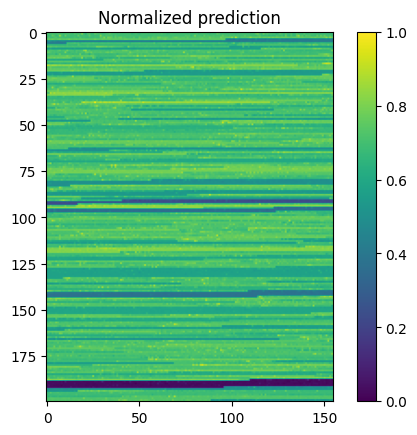

In [183]:
# Separate the row and column indices
row_indices, col_indices = non_nan_indices

# Access the corresponding values in the second matrix
prediction = prediction_full[row_indices, col_indices]
normalized_prediction = (prediction - np.min(prediction)) / (np.max(prediction) - np.min(prediction))
normalized_prediction = normalized_prediction[:normalized_prediction.shape[0]//1000 * 1000].reshape(200, -1)
# Create a heatmap using a colormap (e.g., 'viridis')
plt.imshow(normalized_prediction, cmap='viridis')
plt.colorbar()  # Add a colorbar for reference

# Show the heatmap
plt.title('Normalized prediction')
plt.show()

In [184]:

MF.RMSE(prediction, R_non_nan)

1.0208439335762252